Hola Douglas!

Mi nombre es Matias y voy a estar revisando tu proyecto.

En la primer revision, de encontrar errores voy a estar marcandotelos para que puedas corregirlos por tu cuenta. Lo mas parecido a una situacion real de trabajo como DA. De haber posteriores revisiones

Encontraras mis comentarios debajo - **por favor no los muevas, modifiques o elimines**.

Encontraras mis comentarios en verde, amarillo o rojo de esta manera:

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Cuidado, se recomienda...
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Necesita correcion. El trabajo no puede ser aceptado si precisa correcion.
</div>

Puedes responder a mis comentarios utilizando un mensaje de este tipo:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

# Modelados para las Operaciones de la Petrolera OilyGiant


# Tabla de contenido

* [1 Preprocesamiento de Datos](#1)
* [2 Análisis Exploratorio de Datos (EDA)](#2)
    * [2.1 EDA de la Primera Región](#2.1)
    * [2.2 EDA de la Segunda Región](#2.2)
    * [2.3 EDA de la Tercera Región](#2.3)
* [3 Estandarización de los Datos](#3)
* [4 Evaluación de Modelos](#4)   
    * [3.1 Evaluación del Modelo Lineal para las Tres Regiones](#4.1)   
* [5 Determinar el Volumen Promedio de Reservas](#5)
* [6 Cálculo de Ganancias](#6)
* [7 Cálculo de Beneficios y Riesgos para cada Región](#7)
* [8 Conclusiones Generales](#8)



## Preprocesamiento de Datos

In [1]:
# cargamos todas las librerías

import pandas as pd
import numpy as np
from numpy.random import RandomState
from scipy import stats as st
from scipy.stats import sem
import matplotlib.pyplot as plt
from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


In [2]:
# definimos los dataframes

data_0 = pd.read_csv('/datasets/geo_data_0.csv')

data_1 = pd.read_csv('/datasets/geo_data_1.csv')

data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# mostramos información general de data_0

data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
# mostramos información general de data_1

data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [9]:
# mostramos información general de data_2

data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [10]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


<div class="alert alert-block alert-info">
<b>Agregué los describe a cada Dataframe </b> <a class="tocSkip"></a>
</div>

In [12]:
# eliminamos las columnas "id" de cada dataframe

data_0 = data_0.drop(['id'], axis = 1)

data_1 = data_1.drop(['id'], axis = 1)

data_2 = data_2.drop(['id'], axis = 1)

In [13]:
# volvemos a mostrar la información general de cada dataframe

data_0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [14]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [15]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen comienzo.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Recomiendo siempre sumar al primer vistazo que damos a los datos, ademas de head() e info(), explorar las distribuciones con describe()
</div>

## Análisis Exploratorio de datos (EDA)

In [16]:
# definimos las variables a estudiar para el EDA, de los tres dataframes

var = ['f0', 'f1', 'f2', 'product']

### EDA de la Primera Región

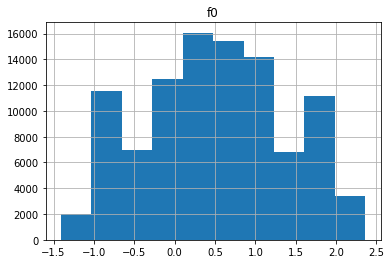

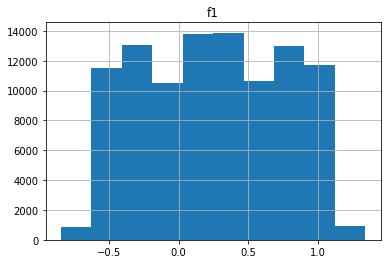

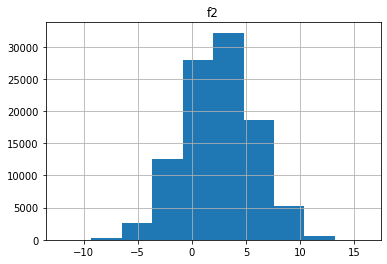

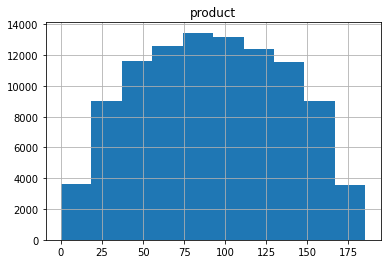

In [17]:
# Histogramas

for i in range(len(var)):
    data_0.hist(var[i])

#### Diagramas de Caja

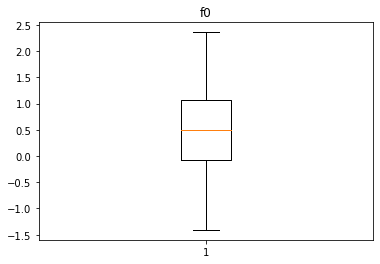

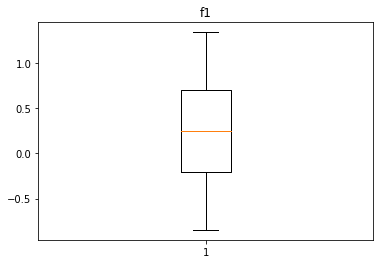

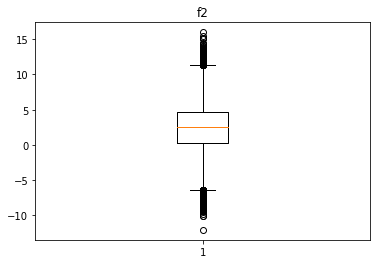

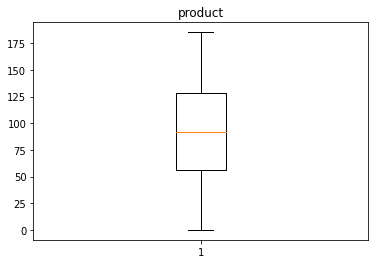

In [18]:
for i in var:
    plt.figure()
    plt.boxplot(data_0[i])
    plt.title(i)

#### Estadística Descriptiva

In [19]:
for i in var:
    print(data_0[i].describe())

count    100000.000000
mean          0.500419
std           0.871832
min          -1.408605
25%          -0.072580
50%           0.502360
75%           1.073581
max           2.362331
Name: f0, dtype: float64
count    100000.000000
mean          0.250143
std           0.504433
min          -0.848218
25%          -0.200881
50%           0.250252
75%           0.700646
max           1.343769
Name: f1, dtype: float64
count    100000.000000
mean          2.502647
std           3.248248
min         -12.088328
25%           0.287748
50%           2.515969
75%           4.715088
max          16.003790
Name: f2, dtype: float64
count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64


#### Estudio de valores atípicos

In [20]:
# Determinamos las funciones para el cálculo de los valores atípicos

def lower_limit(Q1, Q3):
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    return lower

def upper_limit(Q1, Q3):
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    return upper

In [21]:
# Determinamos la función para el cálculo de cuantiles

def quantiles(vector):
    Q1 = vector.quantile(0.25)
    Q3 = vector.quantile(0.75)
    return Q1, Q3

In [22]:
# Cálculo de los cuantiles

data_0_f2 = data_0['f2']
quantiles(data_0_f2)

(0.28774815581444596, 4.715087898413286)

In [23]:
# Cálculo del límite inferior

lower_limit(0.29, 4.72)

-6.3549999999999995

In [24]:
# Cálculo del límite superior

upper_limit(0.29, 4.72)

11.364999999999998

In [25]:
# Definimos las funciones para eliminar los valores atípicos

def porc_inf_atipic(vector, umbral, dataframe):
    sum_vector = (vector < umbral).sum()
    total_df = dataframe.shape[0]
    percent = (sum_vector / total_df) * 100
    return percent

def porc_sup_atipic(vector, umbral, dataframe):
    sum_vector = (vector > umbral).sum()
    total_df = dataframe.shape[0]
    percent = (sum_vector / total_df) * 100
    return percent

In [26]:
# Porcentaje de datos atípicos inferior que serán eliminados

porc_inf_atipic(data_0_f2, -6.35, data_0)

0.26

In [27]:
# Porcentaje de datos atípicos superiores que serán eliminados

porc_sup_atipic(data_0_f2, 11.36, data_0)

0.247

In [28]:
# Almacenamos los datos sin valores atípicos en un nuevo Dataframe

data_0_clean = data_0[(data_0['f2'] < 11.36) & (data_0['f2'] > -6.35)]

data_0_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99493 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       99493 non-null  float64
 1   f1       99493 non-null  float64
 2   f2       99493 non-null  float64
 3   product  99493 non-null  float64
dtypes: float64(4)
memory usage: 3.8 MB


### EDA de la Segunda Región

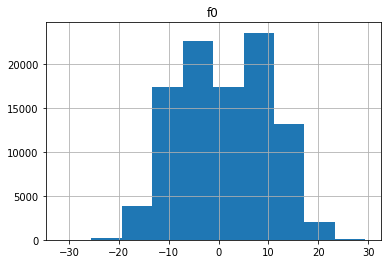

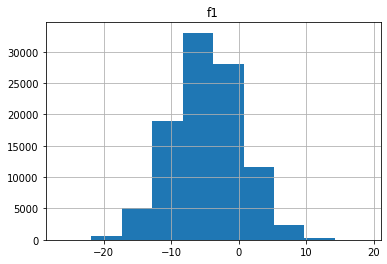

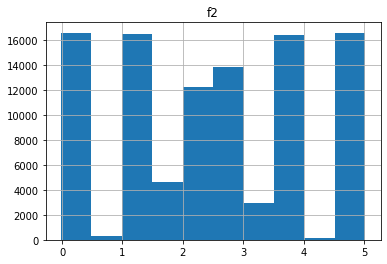

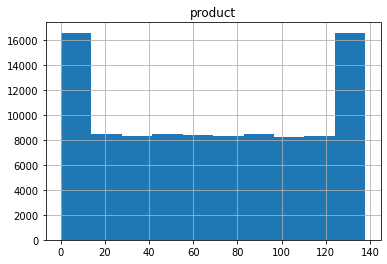

In [29]:
# Histogramas

for i in range(len(var)):
    data_1.hist(var[i])

#### Diagramas de Caja

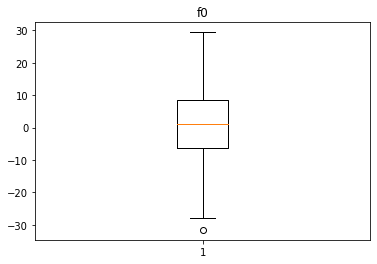

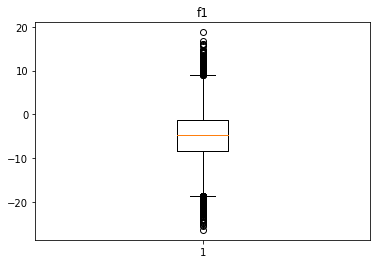

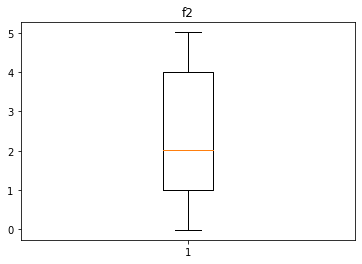

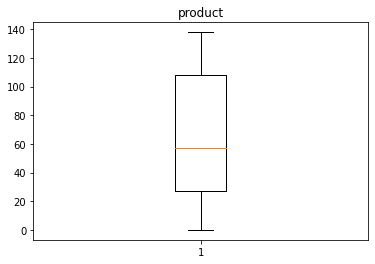

In [30]:
for i in var:
    plt.figure()
    plt.boxplot(data_1[i])
    plt.title(i)

#### Estadística Descriptiva

In [31]:
for i in var:
    print(data_1[i].describe())

count    100000.000000
mean          1.141296
std           8.965932
min         -31.609576
25%          -6.298551
50%           1.153055
75%           8.621015
max          29.421755
Name: f0, dtype: float64
count    100000.000000
mean         -4.796579
std           5.119872
min         -26.358598
25%          -8.267985
50%          -4.813172
75%          -1.332816
max          18.734063
Name: f1, dtype: float64
count    100000.000000
mean          2.494541
std           1.703572
min          -0.018144
25%           1.000021
50%           2.011479
75%           3.999904
max           5.019721
Name: f2, dtype: float64
count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64


#### Estudio de valores atípicos

In [32]:
# Cálculo de los cuantiles

data_1_f1 = data_1['f1']
quantiles(data_1_f1)

(-8.26798483466915, -1.3328160113936642)

In [33]:
# Cálculo del límite inferior

lower_limit(-8.27, -1.33)

-18.68

In [34]:
# Cálculo del límite superior

upper_limit(-8.27, -1.33)

9.08

In [35]:
# Porcentaje de datos atípicos inferior que serán eliminados

porc_inf_atipic(data_1_f1, -18.68, data_1)

0.295

In [36]:
# Porcentaje de datos atípicos superiores que serán eliminados

porc_sup_atipic(data_1_f1, 9.08, data_1)

0.33899999999999997

In [37]:
# Almacenamos los datos sin valores atípicos en un nuevo Dataframe

data_1_clean = data_1[(data_1['f1'] < 9.08) & (data_1['f1'] > -18.68)]

data_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99366 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       99366 non-null  float64
 1   f1       99366 non-null  float64
 2   f2       99366 non-null  float64
 3   product  99366 non-null  float64
dtypes: float64(4)
memory usage: 3.8 MB


### EDA de la Tercera Región

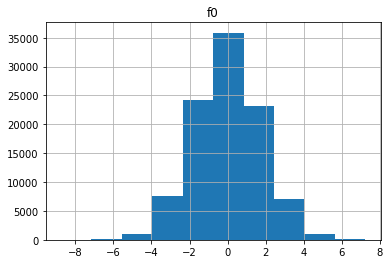

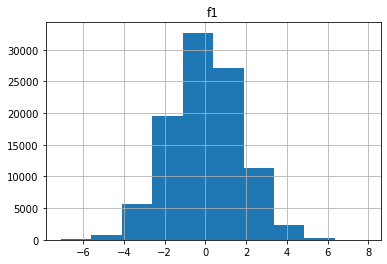

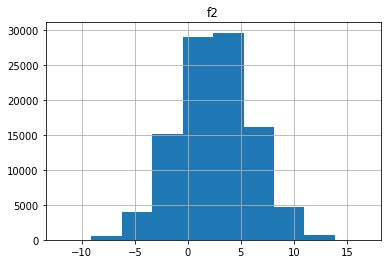

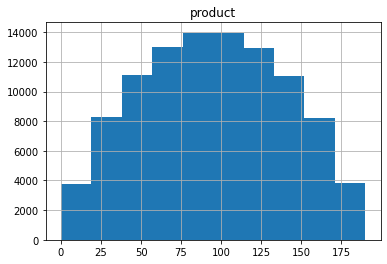

In [38]:
# Histogramas

for i in range(len(var)):
    data_2.hist(var[i])

#### Diagramas de Caja

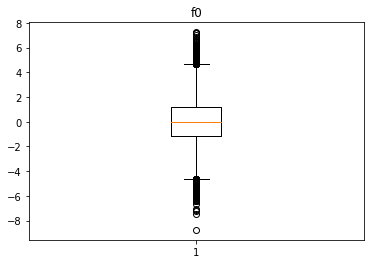

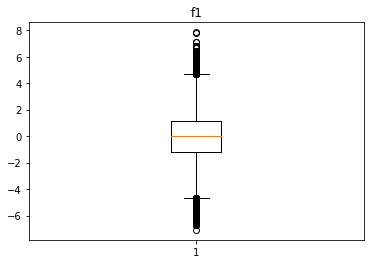

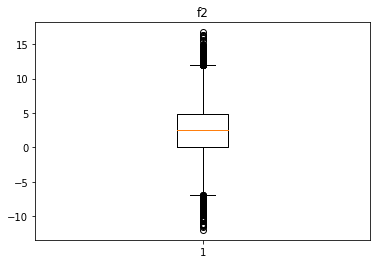

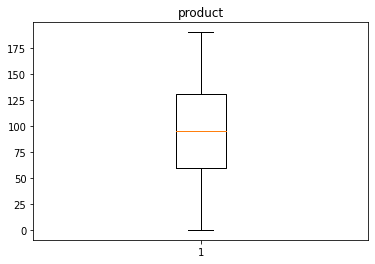

In [39]:
for i in var:
    plt.figure()
    plt.boxplot(data_2[i])
    plt.title(i)

#### Estadística Descriptiva

In [40]:
for i in var:
    print(data_2[i].describe())

count    100000.000000
mean          0.002023
std           1.732045
min          -8.760004
25%          -1.162288
50%           0.009424
75%           1.158535
max           7.238262
Name: f0, dtype: float64
count    100000.000000
mean         -0.002081
std           1.730417
min          -7.084020
25%          -1.174820
50%          -0.009482
75%           1.163678
max           7.844801
Name: f1, dtype: float64
count    100000.000000
mean          2.495128
std           3.473445
min         -11.970335
25%           0.130359
50%           2.484236
75%           4.858794
max          16.739402
Name: f2, dtype: float64
count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64


#### Estudio de valores atípicos

In [41]:
# Cálculo de los cuantiles

data_2_f0 = data_2['f0']
quantiles(data_2_f0)

(-1.1622884801574571, 1.1585353487528773)

In [42]:
# Cálculo del límite inferior

lower_limit(-1.16, 1.15)

-4.624999999999999

In [43]:
# Cálculo del límite superior

upper_limit(-1.16, 1.15)

4.614999999999999

In [44]:
# Porcentaje de datos atípicos inferior que serán eliminados

porc_inf_atipic(data_2_f0, -4.62, data_2)

0.366

In [45]:
# Porcentaje de datos atípicos superiores que serán eliminados

porc_sup_atipic(data_2_f0, 4.61, data_2)

0.398

In [46]:
# Cálculo de los cuantiles

data_2_f1 = data_2['f1']
quantiles(data_2_f1)

(-1.174819610202934, 1.1636778666142238)

In [47]:
# Cálculo del límite inferior

lower_limit(-1.17, 1.16)

-4.665

In [48]:
# Cálculo del límite superior

upper_limit(-1.17, 1.16)

4.655

In [49]:
# Porcentaje de datos atípicos inferior que serán eliminados

porc_inf_atipic(data_2_f1, -6.62, data_2)

0.004

In [50]:
# Porcentaje de datos atípicos superiores que serán eliminados

porc_sup_atipic(data_2_f1, 4.65, data_2)

0.357

In [51]:
# Cálculo de los cuantiles

data_2_f2 = data_2['f2']
quantiles(data_2_f2)

(0.13035864392872082, 4.85879359743347)

In [52]:
# Cálculo del límite inferior

lower_limit(0.13, 4.85)

-6.95

In [53]:
# Cálculo del límite superior

upper_limit(0.13, 4.85)

11.93

In [54]:
# Porcentaje de datos atípicos inferior que serán eliminados

porc_inf_atipic(data_2_f2, -6.95, data_2)

0.301

In [55]:
# Porcentaje de datos atípicos superiores que serán eliminados

porc_sup_atipic(data_2_f2, 11.93, data_2)

0.28800000000000003

In [56]:
# Almacenamos los datos sin valores atípicos en un nuevo Dataframe

data_2_clean = data_2[(data_2['f0'] < 4.61 ) 
                    & (data_2['f0'] > -4.62)
                    & (data_2['f1'] < 4.65)
                    & (data_2['f1'] > -4.62)
                    & (data_2['f2'] < 11.93)
                    & (data_2['f2'] > -6.95)]
        
data_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97927 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       97927 non-null  float64
 1   f1       97927 non-null  float64
 2   f2       97927 non-null  float64
 3   product  97927 non-null  float64
dtypes: float64(4)
memory usage: 3.7 MB


* En este apartado, se limpiaron los tres Dataframes y se utilizaran como data_0_clean, data_1_clean y data_2 clean.
* No era necesario usar la columna 'id'.


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo preprocesando los datos
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Necesita correccion
    
En esta seccion, mas importante que lidiar con los outliers era identificar que las variables numericas en los 3 datasets estan en escalas diferentes y que una **standarizacion/scaling** es algo muy necesario para que el modelo a entrenar sea mejor a la hora de predecir sobre datos desconocidos
</div>

## Estandarización de los datos

In [57]:
data_0_clean.describe()

,f0,f1,f2,product
count,99493.000000,99493.000000,99493.000000,99493.000000
mean,0.500583,0.250042,2.503666,92.502265
std,0.871833,0.504439,3.181088,44.228100
min,-1.408605,-0.848218,-6.349353,0.000000
25%,-0.072374,-0.201075,0.301577,56.569544
50%,0.502611,0.250025,2.516356,91.843135
75%,1.073730,0.700574,4.704297,128.518797
max,2.362331,1.343769,11.358920,185.364347


In [58]:
# Aplicamos el requerimiento standarizacion/scaling

scaler_0 = StandardScaler()
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()

scaler_0.fit(data_0_clean[['f0', 'f1', 'f2']])
scaler_1.fit(data_1_clean[['f0', 'f1', 'f2']])
scaler_2.fit(data_2_clean[['f0', 'f1', 'f2']])

aaa = scaler_0.transform(data_0_clean[['f0', 'f1', 'f2']])
bbb = scaler_1.transform(data_1_clean[['f0', 'f1', 'f2']])
ccc = scaler_2.transform(data_2_clean[['f0', 'f1', 'f2']])



In [59]:
print("Distribución de variables numéricas en data_0_clean antes de la estandarización:")
print(data_0_clean[['f0', 'f1', 'f2']].describe())
print()
print("Distribución de variables numéricas en data_0_clean después de la estandarización:")
print(pd.DataFrame(aaa, columns = ['f0', 'f1', 'f2']).describe())


Distribución de variables numéricas en data_0_clean antes de la estandarización:
                 f0            f1            f2
count  99493.000000  99493.000000  99493.000000
mean       0.500583      0.250042      2.503666
std        0.871833      0.504439      3.181088
min       -1.408605     -0.848218     -6.349353
25%       -0.072374     -0.201075      0.301577
50%        0.502611      0.250025      2.516356
75%        1.073730      0.700574      4.704297
max        2.362331      1.343769     11.358920

Distribución de variables numéricas en data_0_clean después de la estandarización:
                 f0            f1            f2
count  9.949300e+04  9.949300e+04  9.949300e+04
mean  -1.119451e-16 -1.089099e-16 -1.826116e-16
std    1.000005e+00  1.000005e+00  1.000005e+00
min   -2.189866e+00 -2.177204e+00 -2.783030e+00
25%   -6.571898e-01 -8.942993e-01 -6.922475e-01
50%    2.326597e-03 -3.401936e-05  3.989355e-03
75%    6.574074e-01  8.931394e-01  6.917892e-01
max    2.135451e+00

In [60]:
print("Distribución de variables numéricas en data_1 antes de la estandarización:")
print(data_1_clean[['f0', 'f1', 'f2']].describe())
print()
print("Distribución de variables numéricas en data_1 después de la estandarización:")
print(pd.DataFrame(bbb, columns=['f0', 'f1', 'f2']).describe())


Distribución de variables numéricas en data_1 antes de la estandarización:
                 f0            f1            f2
count  99366.000000  99366.000000  99366.000000
mean       1.139654     -4.803380      2.493931
std        8.966287      4.984446      1.703243
min      -31.609576    -18.672469     -0.018144
25%       -6.300550     -8.249911      1.000016
50%        1.150044     -4.816802      2.011353
75%        8.620987     -1.363717      3.999893
max       29.421755      9.050688      5.019721

Distribución de variables numéricas en data_1 después de la estandarización:
                 f0            f1            f2
count  9.936600e+04  9.936600e+04  9.936600e+04
mean  -2.695838e-17  2.674385e-17  1.972180e-16
std    1.000005e+00  1.000005e+00  1.000005e+00
min   -3.652504e+00 -2.782488e+00 -1.474886e+00
25%   -8.298019e-01 -6.914606e-01 -8.771050e-01
50%    1.158821e-03 -2.692603e-03 -2.833307e-01
75%    8.343889e-01  6.900828e-01  8.841777e-01
max    3.154287e+00  2.779474e+

In [61]:
print("Distribución de variables numéricas en data_2 antes de la estandarización:")
print(data_2_clean[['f0', 'f1', 'f2']].describe())

print("Distribución de variables numéricas en data_2 después de la estandarización:")
print(pd.DataFrame(ccc, columns=['f0', 'f1', 'f2']).describe())

Distribución de variables numéricas en data_2 antes de la estandarización:
                 f0            f1            f2
count  97927.000000  97927.000000  97927.000000
mean       0.001121     -0.001016      2.493968
std        1.678223      1.679231      3.389297
min       -4.619392     -4.618931     -6.944602
25%       -1.152568     -1.162585      0.147601
50%        0.009137     -0.008432      2.482528
75%        1.148110      1.155204      4.839542
max        4.605301      4.649888     11.927669
Distribución de variables numéricas en data_2 después de la estandarización:
                 f0            f1            f2
count  9.792700e+04  9.792700e+04  9.792700e+04
mean  -2.205776e-17  1.378610e-17  1.080395e-16
std    1.000005e+00  1.000005e+00  1.000005e+00
min   -2.753231e+00 -2.750032e+00 -2.784831e+00
25%   -6.874502e-01 -6.917305e-01 -6.922909e-01
50%    4.776495e-03 -4.416555e-03 -3.375509e-03
75%    6.834579e-01  6.885449e-01  6.920568e-01
max    2.743499e+00  2.769678e+0

In [62]:
data_0_scaled = pd.DataFrame(aaa, columns=['f0', 'f1', 'f2'])
data_0_scaled.describe()

,f0,f1,f2
count,9.949300e+04,9.949300e+04,9.949300e+04
mean,-1.119451e-16,-1.089099e-16,-1.826116e-16
std,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.189866e+00,-2.177204e+00,-2.783030e+00
25%,-6.571898e-01,-8.942993e-01,-6.922475e-01
50%,2.326597e-03,-3.401936e-05,3.989355e-03
75%,6.574074e-01,8.931394e-01,6.917892e-01
max,2.135451e+00,2.168216e+00,2.783732e+00


In [63]:
data_1_scaled = pd.DataFrame(bbb, columns=['f0', 'f1', 'f2'])
data_2_scaled = pd.DataFrame(ccc, columns=['f0', 'f1', 'f2'])

<div class="alert alert-block alert-success">
<b>Comentario de Revisor -2da ITERACION</b> <a class="tocSkip"></a>

Buen trabajo con la correccion de la seccion anterior
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor -2da ITERACION</b> <a class="tocSkip"></a>

Necesita correccion
    
Deberias instanciar 1 objeto scaler por cada dataset, fitear cada scaler a las features numericas y luego transformar las numericas de cada dataset con su objeto scaler (aqui usas el mismo para todas)
    
Por ultimo, corrobora que haya funcionado con el metodo describe comparando contra como daba la distribucion de las var numericas antes de aplicar el scaler

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor - 3ra ITERACION</b> <a class="tocSkip"></a>

Buen trabajo con la correccion del scalin pero hay un detalle
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor - 3ra ITERACION</b> <a class="tocSkip"></a>

Necesita correccion    
    
Me disculpo por no haber sido claro y explicar esto en mi anterior evaluacion
    
No deberiamos aplicar scaling a la variable objetivo/target "product" solo a las features f0,f1 y f2

</div>

## Evaluación de Modelos

In [64]:
# dividimos de los datos en conjuntos de entrenamiento y validación para la región 0

X_region_0 = data_0_clean.drop(['product'], axis=1)
y_region_0 = data_0_clean['product']

X_train_region_0, X_val_region_0, y_train_region_0, y_val_region_0 = train_test_split(X_region_0, y_region_0, test_size=0.25, random_state=12345)

# entrenamos el modelo para la región 0

model_region_0 = LinearRegression()
model_region_0.fit(X_train_region_0, y_train_region_0)

# dividimos de los datos en conjuntos de entrenamiento y validación para la región 1

X_region_1 = data_1_clean.drop(['product'], axis=1)
y_region_1 = data_1_clean['product']

X_train_region_1, X_val_region_1, y_train_region_1, y_val_region_1 = train_test_split(X_region_1, y_region_1, test_size=0.25, random_state=12345)

# entrenamos el modelo para la región 1

model_region_1 = LinearRegression()
model_region_1.fit(X_train_region_1, y_train_region_1)

# dividimos de los datos en conjuntos de entrenamiento y validación para la región 2

X_region_2 = data_2_clean.drop(['product'], axis=1)
y_region_2 = data_2_clean['product']

X_train_region_2, X_val_region_2, y_train_region_2, y_val_region_2 = train_test_split(X_region_2, y_region_2, test_size=0.25, random_state=12345)

# entrenamos el modelo para la región 2

model_region_2 = LinearRegression()
model_region_2.fit(X_train_region_2, y_train_region_2)



LinearRegression()

In [65]:
# calculamos las predicciones para el conjunto de validación de la región 0

y_pred_region_0 = model_region_0.predict(X_val_region_0)

# calculamos el volumen promedio de reservas previstas y el error cuadrático medio (MSE) para la región 0

mean_predicted_volume_region_0 = y_pred_region_0.mean()
mse_region_0 = mean_squared_error(y_val_region_0, y_pred_region_0) ** 0.5

# calculamos las predicciones para el conjunto de validación de la región 1

y_pred_region_1 = model_region_1.predict(X_val_region_1)

# calculamos el volumen promedio de reservas previstas y el error cuadrático medio (MSE) para la región 1

mean_predicted_volume_region_1 = y_pred_region_1.mean()
mse_region_1 = mean_squared_error(y_val_region_1, y_pred_region_1) ** 0.5

# calculamos las predicciones para el conjunto de validación de la región 2

y_pred_region_2 = model_region_2.predict(X_val_region_2)

# calculamos el volumen promedio de reservas previstas y el error cuadrático medio (MSE) para la región 2

mean_predicted_volume_region_2 = y_pred_region_2.mean()
mse_region_2 = mean_squared_error(y_val_region_2, y_pred_region_2) ** 0.5

In [66]:
# imprimimos todos los errores cuadráticos medios 

print('Error cuadrático medio (MSE) de la región 1:', round(mse_region_0, 2))
print('Error cuadrático medio (MSE) de la región 2:', round(mse_region_1, 2))
print('Error cuadrático medio (MSE) de la región 3:', round(mse_region_2, 2))

Error cuadrático medio (MSE) de la región 1: 37.81
Error cuadrático medio (MSE) de la región 2: 0.89
Error cuadrático medio (MSE) de la región 3: 40.39


* Acá podemos observar las metricas correspondientes, las regiones 1 y 3 tienen dispersiones similares, mientras que la región 2 posee una discrepancia mucho menos entre las predicciones y valores reales. Lo cual nos lleva que es capaz de hacer predicciones más precisas.




<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo con la Reg Lineal para las 3 regiones y el caluclo de la metrica solicitada
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Recomiendo tener en celdas diferentes el split y en otra la regresion con los calculos de metricas de performance
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Recuerda volver a correr esta seccion luego de haber aplicado el saling solicitado en la seccion previa
</div>

<div class="alert alert-block alert-info">
<b>Apliqué el requerimiento de estandarización scaling, ordene las celdas por split y por cálculos y mejoraron los datos</b> <a class="tocSkip"></a>
</div>

## Determinar el Volumen Promedio de Reservas

In [67]:
# Contando el número de productos para obtener una ganancia de 0

budget = 100000000  
wells_to_dig = 200  
num_wells = 200     
revenue_per_barrel = 4.5

cost_per_well = budget / wells_to_dig  
points_per_budget = int(budget / cost_per_well)  

product_price = 4500 

cost_per_point = budget / points_per_budget  
zero_profit_product = cost_per_point / product_price  

# Comparar el volumen de reservas suficiente con el volumen promedio de reservas de cada región

average_volume_region_0 = y_region_0.mean()
average_volume_region_1 = y_region_1.mean()
average_volume_region_2 = y_region_2.mean()

# Proporcionar hallazgos sobre la preparación para el cálculo de ganancias

print("Volumen de reservas suficiente para no tener pérdidas:", round(zero_profit_product, 2))
print()
print("Volumen promedio de reservas de la región 1:", round(average_volume_region_0, 2))
print("Volumen promedio de reservas de la región 2:", round(average_volume_region_1, 2))
print("Volumen promedio de reservas de la región 3:", round(average_volume_region_2, 2))


Volumen de reservas suficiente para no tener pérdidas: 111.11

Volumen promedio de reservas de la región 1: 92.5
Volumen promedio de reservas de la región 2: 68.81
Volumen promedio de reservas de la región 3: 94.77


* Acá se puede notar que serían 111.11 miles barriles de petróleo los necesarios para producir para que los 200 pozos no tengan pérdida. 

* También se muestra que cada región tiene un volumen promedio de reservas, que van desde los 68.81 miles de barriles a 94.77 miles. 


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo en estos calculos.
</div>

## Cálculo de las Ganancias

In [68]:
# definimos la función para calcular las ganancias

def cal_pro(target, predictions, well_to_dig):
        predictions_sorted = pd.Series(predictions).sort_values(ascending=False)
        max_mean = predictions_sorted[:well_to_dig].mean()
        target = 111.11
        total_profit = (max_mean - target) * product_price 
        return total_profit

In [69]:
# calculamos la ganancia para cada región

well_to_dig = 200

profit_region_0 = cal_pro(y_val_region_0, y_pred_region_0, 200)
profit_region_1 = cal_pro(y_val_region_1, y_pred_region_1, 200)
profit_region_2 = cal_pro(y_val_region_2, y_pred_region_2, 200)

# imprimimos los resultados

print("Ganancia total para la región 1:", round(profit_region_0, 2))
print("Ganancia total para la región 2:", round(profit_region_1, 2))
print("Ganancia total para la región 3:", round(profit_region_2, 2))

Ganancia total para la región 1: 184776.36
Ganancia total para la región 2: 124321.26
Ganancia total para la región 3: 150729.99


* Podemos observar que la Región 1, con sus 184 mil, es la región que mayores ganancias reportaría por el desarrollo de sus 200 pozos más productivos.





<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

El enfoque que le diste es correcto, venia por buen camino
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Define una variable **wells to dig** para limitar tu variable selected targets pero nunca se la pasas como parametro a tu funcion de manera de tomar los 200 pozos mas productivos y de esta manera el calculo termina siendo erroneo
</div>

<div class="alert alert-block alert-info">
<b>A la función le pase el parametro well_to_dig, posteriormente al momento de aplicar la funcion defino la variable = 200, pero me siguen dando los mismos millones de dólares. ¿Está correcto o hay que cambiarle algo?</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor - 2da ITERACION</b> <a class="tocSkip"></a>

El calculo seria de las top predicciones tomar la media esperada y sobre el calculo anterior del objetivo para que sea rentable tomar las ganancias
    
Entonces tu funcion deberia ser algo asi
    
<code>
    def cal_pro(target, predictions, well_to_dig):
        predictions_sorted = pd.Series(predictions).sort_values(ascending=False)
        max_mean = predictions_sorted[:well_to_dig].mean()
        target = 111.11
        total_profit = (max_mean - target) * product_price 
        return total_profit
</code>
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor -3ra ITERACION</b> <a class="tocSkip"></a>

Buen trabajo con esta
</div>

## Cálculo de Beneficios y Riesgos para cada Región

In [70]:
# determinamos la función para calcular los riesgos y ganancias mediante bootstrapping

def evaluar_boot(target, predictions):
    profits = []
    random_state = np.random.RandomState(12345)

    for _ in range(1000):
        target_subsample = target.sample(n = 500, replace = True, random_state = random_state)
        profits.append(cal_pro(target_subsample.values, predictions[target_subsample.index], well_to_dig))
        
    mean_profit = pd.Series(profits).mean()
    lower_profit = pd.Series(profits).quantile(0.025)
    upper_profit = pd.Series(profits).quantile(0.975)
    losses = sum(pd.Series(profits) < 0) / len(profits)
    return mean_profit, lower_profit, upper_profit, losses

In [71]:
# reseteamos

y_val_region_0 = y_val_region_0.reset_index(drop=True)
y_val_region_1 = y_val_region_1.reset_index(drop=True)
y_val_region_2 = y_val_region_2.reset_index(drop=True)

y_pred_region_0 = pd.Series(y_pred_region_0)
y_pred_region_1 = pd.Series(y_pred_region_1)
y_pred_region_2 = pd.Series(y_pred_region_2)

In [72]:
# aplicamos la función evaluar_boot a cada región

mean_profit_region_0, lower_profit_region_0, upper_profit_region_0, losses_0 = evaluar_boot(y_val_region_0, y_pred_region_0)
mean_profit_region_1, lower_profit_region_1, upper_profit_region_1, losses_1 = evaluar_boot(y_val_region_1, y_pred_region_1)
mean_profit_region_2, lower_profit_region_2, upper_profit_region_2, losses_2 = evaluar_boot(y_val_region_2, y_pred_region_2)


In [73]:
# imprimos los beneficios por cada región

print('Región 1')
print(f'Beneficio promedio de la región 1 es de: {mean_profit_region_0:.2f}$')
print(f'Los beneficios oscilan entre: {lower_profit_region_0:.2f}$ a {upper_profit_region_0:.2f}$')
print(f'El riesgo de pérdida es de: {losses_0:.1%}')
print()
print('Región 2')
print(f'Beneficio promedio de la región 2 es de: {mean_profit_region_1:.2f}$')
print(f'Los beneficios oscilan entre: {lower_profit_region_1:.2f}$ a {upper_profit_region_1:.2f}$')
print(f'El riesgo de pérdida es de: {losses_1:.1%}')
print()
print('Región 3')
print(f'Beneficio promedio de la región 3 es de: {mean_profit_region_2:.2f}$')
print(f'Los beneficios oscilan entre: {lower_profit_region_2:.2f}$ a {upper_profit_region_2:.2f}$')
print(f'El riesgo de pérdida es de: {losses_2:.1%}')

Región 1
Beneficio promedio de la región 1 es de: 16685.29$
Los beneficios oscilan entre: 5558.03$ a 28042.96$
El riesgo de pérdida es de: 0.0%

Región 2
Beneficio promedio de la región 2 es de: 20164.13$
Los beneficios oscilan entre: 237.97$ a 39869.51$
El riesgo de pérdida es de: 2.4%

Región 3
Beneficio promedio de la región 3 es de: 13692.93$
Los beneficios oscilan entre: 4270.95$ a 22658.21$
El riesgo de pérdida es de: 0.2%


* Podemos observar que, al momento de comparar los distintos resultados por regiones, la mejor región para invertir es la Región 2, mostrando que su beneficio promedio es de 20164 dólares y con un riesgo de pérdida de 2.4%

* Las otras regiones, como la Región 1, muestra mejor beneficio promedio que la Región 2 pero con un riesgo de pérdida casi del doble. 

* Por otro lado, la región 3 muestra un beneficio promedio menor a las dos regiones antes mencionadas además de un riesgo de pérdida mucho mayor, siendo el 11.4%

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Tu bucle de bootstrapping parecia correcto pero arrastras el error de la funcion de calculo anterior
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Cuando hagas las correcciones a tu funcion **cal_pro()** vuelve a correr esta seccion procurando que el bootstraping sea efectivo y el calculo de ganancias/riesgos cohrente
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor - 3ra ITERACION</b> <a class="tocSkip"></a>

Genial con la correccion de la seccion anterior ahora esta seccion tambien esta correcta

</div>

## Conclusiones Generales

* Con los tres Dataframes utilizados, eliminamos valores atípicos y los limpiamos. 
* Con respecto al calcular el MSE, la región 2 fue la que nos mostró un ajuste más cercano a los datos, siendo capaz de demostrar que es la mejor región a invertir.
* Se determinó que el volumen suficiente para no tener pérdidas es de 111.11 miles de barriles de petróleo y cada región estaba en el rango de 68.81 y 94.77 miles de barriles.
* La Región 1 es la que reporta mayores ganancias por el desarrollo de 200 pozos, con un total de 35.44 millones de dólares.
* Con respecto al beneficio promedio y el riesgo de pérdidas, la mejor región es la 2, a partir de un estudio con la té



Podemos observar que la Región 1, con sus 35.44 millones de dólares, es la región que mayores ganancias reportaría por el desarrollo de sus 200 pozos más productivos.
Volumen de reservas suficiente para no tener pérdidas: 111.11

Volumen promedio de reservas de la región 1: 92.5
Volumen promedio de reservas de la región 2: 68.81
Volumen promedio de reservas de la región 3: 94.77
Acá se puede notar que serían 111.11 miles barriles de petróleo los necesarios para producir para que los 200 pozos no tengan pérdida.

También se muestra que cada región tiene un volumen promedio de reservas, que van desde los 68.81 miles de barriles a 94.77 miles.

Esto sugiere que el modelo tiene un ajuste más cercano a los datos de la región 2 y es capaz de hacer predicciones más precisas en esta región en particular.

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor - 2da ITERACION</b> <a class="tocSkip"></a>

Te deje comentarios para corregir la aplicacion del scaler y la funcion de calculo de ganancias
    
Recuerda que la parte del bootstraping deberia cambiar luego de modificar la funcion que calcula ganancuias
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor - 3ra ITERACION</b> <a class="tocSkip"></a>

Genial Douglas aplicaste buenas correciones, tu proyecto ya casi esta listo para ser aprobado
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor - 3ra ITERACION</b> <a class="tocSkip"></a>

Solo queda corregir el tema del scaling, es una pequena correccion pero conceptualmente es un error importante

Recuerda el scaling es solo para los features con que se van a entrenar y testear los modelos, pero nunca debe scalarse la variable objetivo
    
Me disculpo por no haber sido claro y explicar esto en mi anterior evaluacion
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor - 4ta ITERACION</b> <a class="tocSkip"></a>

Felicitaciones Douglas tu proyecto esta aprobado
</div>
